170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


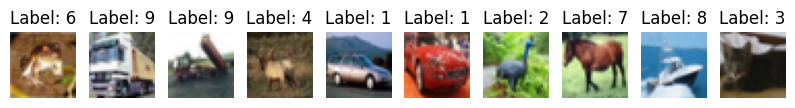

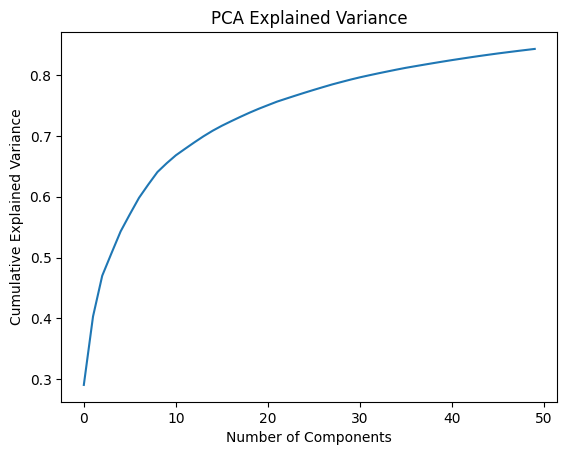

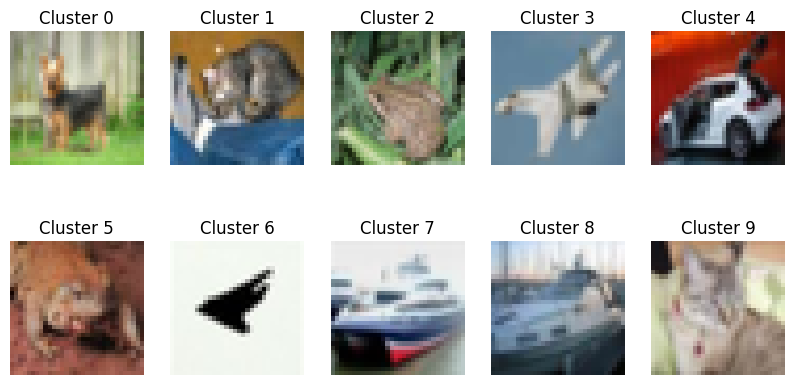

Accuracy: 0.4692
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.58      0.55      1000
           1       0.51      0.56      0.53      1000
           2       0.37      0.30      0.33      1000
           3       0.35      0.32      0.33      1000
           4       0.44      0.40      0.42      1000
           5       0.41      0.39      0.40      1000
           6       0.47      0.58      0.52      1000
           7       0.52      0.44      0.48      1000
           8       0.57      0.62      0.59      1000
           9       0.48      0.53      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.47     10000
weighted avg       0.46      0.47      0.47     10000



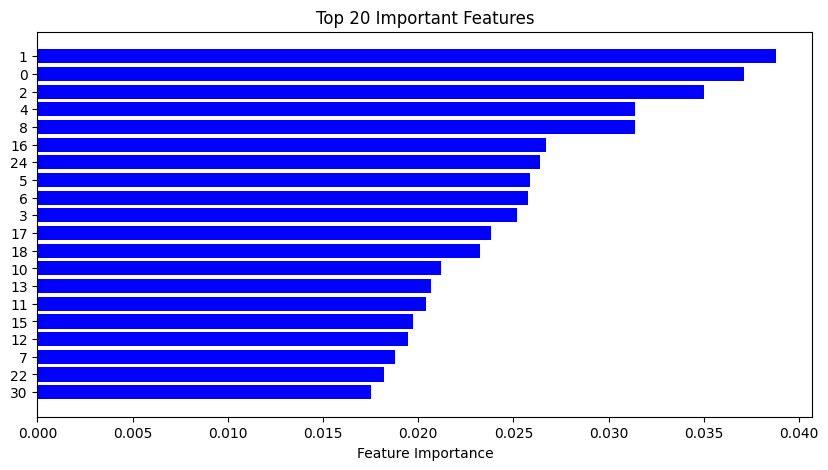

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# Visualize a few images from the dataset
def plot_sample_images(X, y, num_images=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(X[i])
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

plot_sample_images(X_train, y_train)

# Flatten images for PCA and clustering
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# PCA for dimensionality reduction
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Visualize the explained variance
def plot_explained_variance(pca):
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title("PCA Explained Variance")
    plt.show()

plot_explained_variance(pca)

# KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_pca)
cluster_labels = kmeans.predict(X_test_pca)

# Visualize clustering
def plot_clusters(X, labels, num_clusters=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_clusters):
        cluster_indices = np.where(labels == i)
        plt.subplot(2, 5, i+1)
        plt.imshow(X[cluster_indices[0][0]])
        plt.title(f"Cluster {i}")
        plt.axis('off')
    plt.show()

plot_clusters(X_test, cluster_labels)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)
y_pred = rf.predict(X_test_pca)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance plot
def plot_feature_importance(model, num_features=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-num_features:]
    plt.figure(figsize=(10, 5))
    plt.barh(range(num_features), importances[indices], color='b', align='center')
    plt.yticks(range(num_features), indices)
    plt.xlabel('Feature Importance')
    plt.title("Top 20 Important Features")
    plt.show()

plot_feature_importance(rf)
